In [2]:
#!pip install tensorflow
import os

In [3]:
print(os.getcwd())

C:\Users\037813744\Railway


In [4]:
train_dir = os.path.join('../input/railway-track-fault-detection/dataset/Train')
validation_dir = os.path.join('../input/railway-track-fault-detection/dataset/Validation')

# Directory with our training defective/nondefective pictures
train_defective_dir = os.path.join('../input/railway-track-fault-detection/dataset/Train/Defective')
train_nondefective_dir = os.path.join('../input/railway-track-fault-detection/dataset/Train/Non defective')

# Directory with our validation defective/nondefective pictures
validation_defective_dir = os.path.join('../input/railway-track-fault-detection/dataset/Validation/Defective')
validation_nondefective_dir = os.path.join('../input/railway-track-fault-detection/dataset/Validation/Non defective')

In [5]:
train_defective_fnames = os.listdir(train_defective_dir )
train_nondefective_fnames = os.listdir( train_nondefective_dir)

print(train_defective_fnames[:20])
print(train_nondefective_fnames[:20])


['131004959_171473721383413_8222187747086021011_n.jpg', '131051004_382613492830631_1306891331783850055_n.jpg', '131065180_999185033824671_7735147288489715620_n.jpg', '131084537_190751489449739_279862595635733772_n.jpg', '131092897_149705809860659_8798464983059531038_n.jpg', '131098429_134147575143001_1246437012995704959_n.jpg', '131129946_140815574232570_8925999503657494497_n.jpg', '131275810_2686956714949012_5021348409242545922_n.jpg', '131348023_405054987354853_8834671660058234194_n.jpg', '131437543_500273490949549_5045378072687137331_n.jpg', '2007.05.16_-_002_Broken_rail_weld_-_Flickr_-_faxepl (1).jpg', '2007.05.16_-_002_Broken_rail_weld_-_Flickr_-_faxepl.jpg', '6411009.jpg', '89e8b1a9ca8c41919021f8f4faaf37f0.jpg', 'azer2003120026fbtr.jpg', 'b17bf671d87cb6c9d6cfcd2aafc8e13a.jpg', 'Broken_railroad_tracks_1.jpg', 'cracked-rail.webp', 'damagetotrackfromcollisionlfb.jpg', 'dbb9223f7e652986a00c0dd8d8f1ccf8 (1).jpg']
['IMG_20201114_100021.jpg', 'IMG_20201114_100032.jpg', 'IMG_20201114_100

In [6]:
print('total training defective images :', len(os.listdir(train_defective_dir)))
print('total training non-defective images :', len(os.listdir(train_nondefective_dir)))


print('total validation defective images :', len(os.listdir( validation_defective_dir ) ))
print('total validation non-defective images :', len(os.listdir( validation_nondefective_dir) ))

total training defective images : 150
total training non-defective images : 150
total validation defective images : 31
total validation non-defective images : 31


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 10x10 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

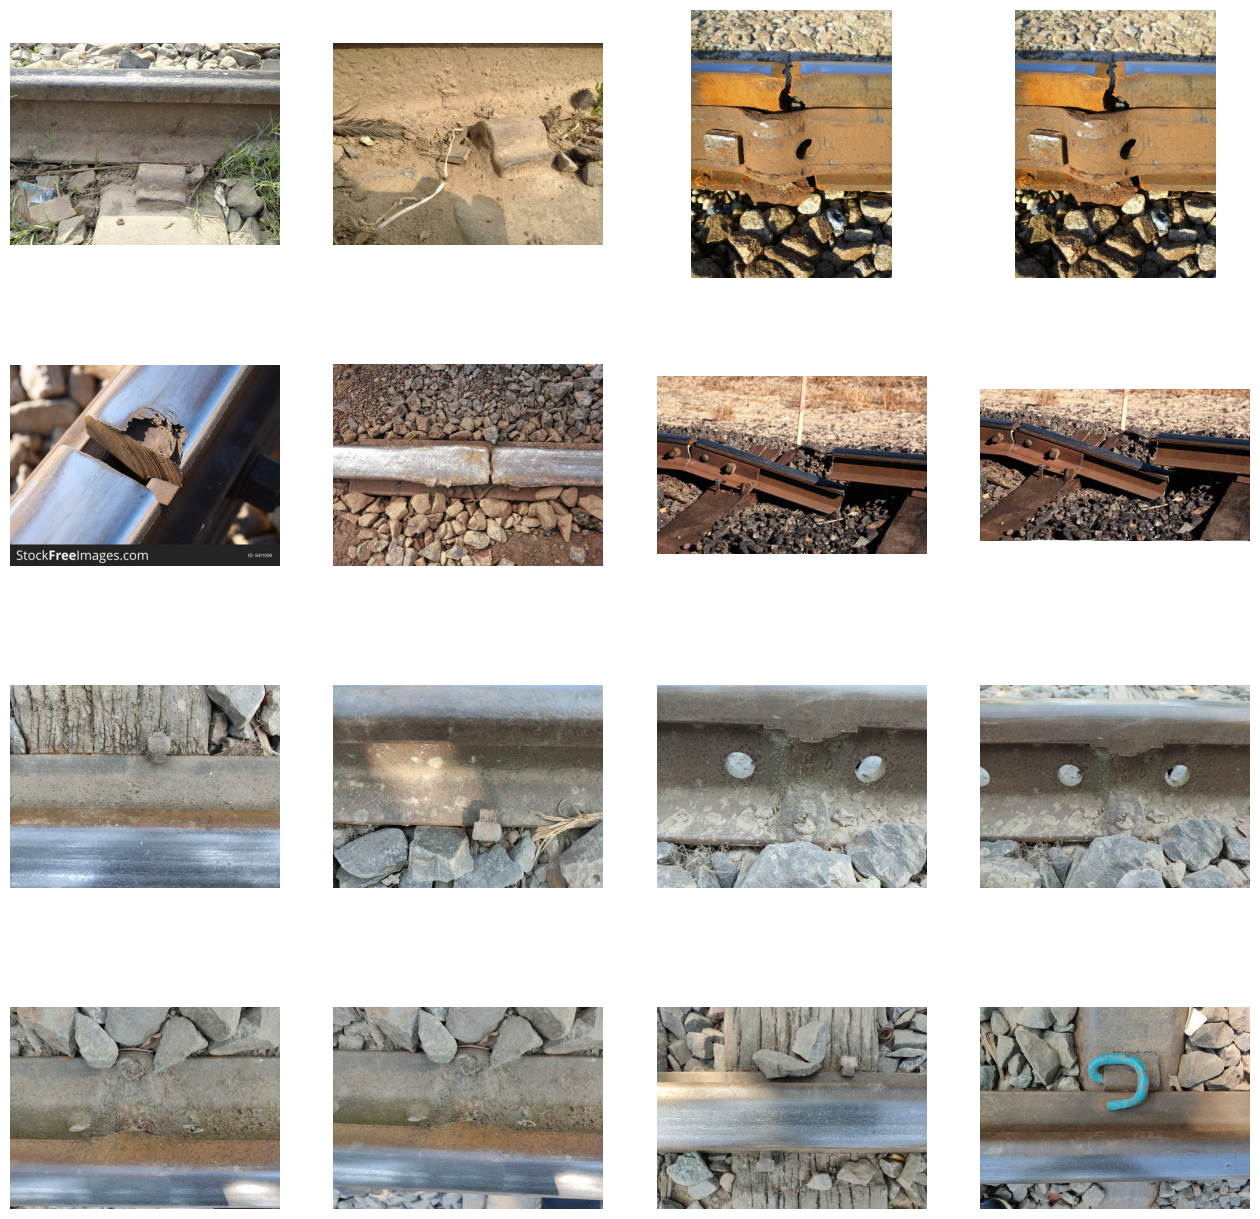

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_defective_pix = [os.path.join(train_defective_dir, fname) 
                for fname in train_defective_fnames[pic_index-8:pic_index]]
next_nondefective_pix = [os.path.join(train_nondefective_dir, fname) 
                for fname in train_nondefective_fnames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_defective_pix+next_nondefective_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [10]:
import tensorflow as tf

In [11]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '../input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


pre_trained_model = InceptionV3(input_shape = (300,300, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 300, 300, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 149, 149, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 149, 149, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 147, 147, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 147, 147, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 147, 147, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 147, 147, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 147, 147, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 147, 147, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 73, 73, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 73, 73, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 73, 73, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 71, 71, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

last layer output shape:  (None, 17, 17, 768)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(300,300))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (300,300))

Found 299 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [13]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)

# Add a fully connected layer with 128 hidden units and ReLU activation
x = layers.Dense(128, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer for binary classification
x = layers.Dense(1, activation='sigmoid')(x)

# Create a new model combining the pre-trained base and the new layers
model = Model(pre_trained_model.input, x)

# Compile the model with RMSprop optimizer and a low learning rate
model.compile(optimizer=RMSprop(learning_rate=0.0001),  # Use 'learning_rate' instead of 'lr'
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [83]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 300, 300, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_94 (Conv2D)            │ (None, 149, 149, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_94        │ (None, 149, 149, 32)      │              96 │ conv2d_94[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_94 (Activation)    │ (None, 149, 149, 32)      │               0 │ batch_normalization_94[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_95 (Conv2D)            │ (None, 147, 147, 32)      │           9,216 │ activation_94[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_95        │ (None, 147, 147, 32)      │              96 │ conv2d_95[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_95 (Activation)    │ (None, 147, 147, 32)      │               0 │ batch_normalization_95[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_96 (Conv2D)            │ (None, 147, 147, 64)      │          18,432 │ activation_95[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_96        │ (None, 147, 147, 64)      │             192 │ conv2d_96[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_96 (Activation)    │ (None, 147, 147, 64)      │               0 │ batch_normalization_96[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 73, 73, 64)        │               0 │ activation_96[0][0]        │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_97 (Conv2D)            │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_97        │ (None, 73, 73, 80)        │             240 │ conv2d_97[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_97 (Activation)    │ (None, 73, 73, 80)        │               0 │ batch_normalization_97[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_98 (Conv2D)            │ (None, 71, 71, 192)       │         138,24

 Total params: 37,385,377 (142.61 MB)

 Trainable params: 28,410,113 (108.38 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [14]:

history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=30,
                              validation_steps=5,
                              verbose=2)



Epoch 1/30


C:\Users\037813744\AppData\Local\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 - 237s - 24s/step - accuracy: 0.4650 - loss: 1.3666 - val_accuracy: 0.5806 - val_loss: 0.6282
Epoch 2/30


C:\Users\037813744\AppData\Local\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 - 41s - 4s/step - accuracy: 0.5657 - loss: 0.7265 - val_accuracy: 0.8548 - val_loss: 0.5547
Epoch 3/30
10/10 - 144s - 14s/step - accuracy: 0.6300 - loss: 0.6312 - val_accuracy: 0.7258 - val_loss: 0.5894
Epoch 4/30
10/10 - 26s - 3s/step - accuracy: 0.6263 - loss: 0.6431 - val_accuracy: 0.7581 - val_loss: 0.5345
Epoch 5/30
10/10 - 108s - 11s/step - accuracy: 0.6633 - loss: 0.6188 - val_accuracy: 0.8387 - val_loss: 0.4696
Epoch 6/30
10/10 - 26s - 3s/step - accuracy: 0.7000 - loss: 0.5907 - val_accuracy: 0.8065 - val_loss: 0.4958
Epoch 7/30
10/10 - 122s - 12s/step - accuracy: 0.7050 - loss: 0.5549 - val_accuracy: 0.7903 - val_loss: 0.4936
Epoch 8/30
10/10 - 29s - 3s/step - accuracy: 0.7778 - loss: 0.5299 - val_accuracy: 0.7419 - val_loss: 0.4915
Epoch 9/30
10/10 - 108s - 11s/step - accuracy: 0.7250 - loss: 0.5456 - val_accuracy: 0.6129 - val_loss: 0.6025
Epoch 10/30
10/10 - 37s - 4s/step - accuracy: 0.6970 - loss: 0.5658 - val_accuracy: 0.8387 - val_loss: 0.4256
Epoch 11/30
10/10 - 1

Text(0.5, 1.0, 'Training and validation loss')

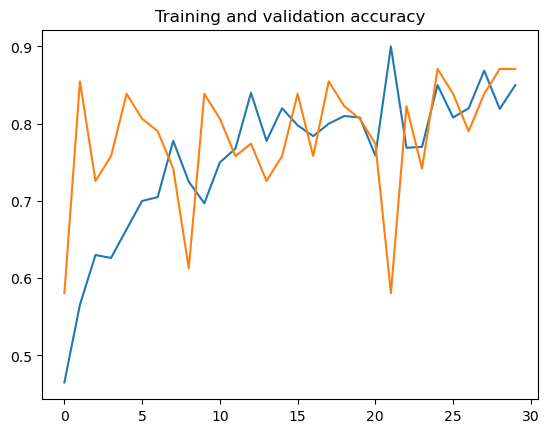

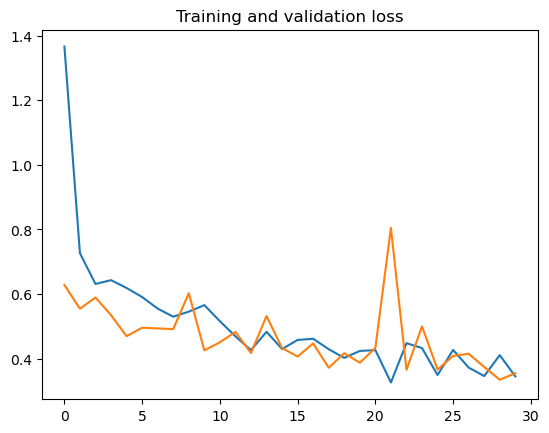

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'  )

In [86]:
!pip install opencv-python

     ---------------------------------------- 38.8/38.8 MB 3.2 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[1.7782375e-11]]
This Railway track has no fault


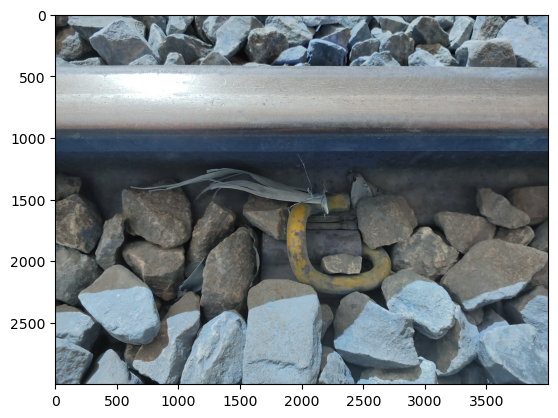

In [16]:
import cv2
import numpy as np
img = cv2.imread('../input/railway-track-fault-detection/dataset/Test/Non Defective/IMG_20201114_102431.jpg')
plt.imshow(img)
img = cv2.resize(img,(300,300))
img = np.reshape(img,[1,300,300,3])

classes = model.predict(img)

print(classes)
if classes>0.5e-15:
    print("This Railway track has no fault")
else:
    print("This Railway track has fault")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
[[0.]]
This Railway track has fault


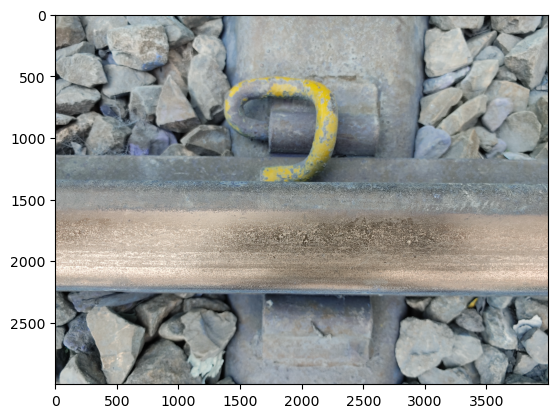

In [17]:
import cv2
import numpy as np
img = cv2.imread('../input/railway-track-fault-detection/dataset/Test/Defective/IMG_20201114_100209.jpg')
plt.imshow(img)
img = cv2.resize(img,(300,300))
img = np.reshape(img,[1,300,300,3])

classes = model.predict(img)

print(classes)
if classes>0.5e-15:
    print("This Railway track has no fault")
else:
    print("This Railway track has fault")

In [89]:
pip install Flask tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Save the model in the new Keras format
MODEL_PATH = '../input/inceptionv3/inception_V3_trained_model.keras'
model.save(MODEL_PATH)

In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Initialize Flask app
app = Flask(__name__)

# Load pre-trained InceptionV3 model and custom weights
MODEL_PATH = '../input/inceptionv3/inception_V3_trained_model.keras'
model = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))
model.load_weights(MODEL_PATH)

# Function to prepare the input image
def prepare_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array

# Define API endpoint for prediction
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file provided'}), 400

    file = request.files['file']

    # Save the file to a temporary location
    file_path = os.path.join('./', file.filename)
    file.save(file_path)

    try:
        # Prepare the image for the model
        prepared_image = prepare_image(file_path)

        # Make predictions
        predictions = model.predict(prepared_image)

        # Process predictions
        if len(predictions.shape) == 4:  # Handle case when predictions are in shape (batch_size, height, width, channels)
            predictions = np.mean(predictions, axis=(1, 2, 3))  # Flatten to (batch_size, features)
        
        # Assuming predictions are probabilities for binary classification
        probability = predictions[0]
        predicted_class = 'fault' if probability < 0.5 else 'no fault'

        # Return the result
        return jsonify({
            'predicted_class': predicted_class,
            'probability': float(probability)  # Convert numpy float to Python float
        })

    except Exception as e:
        return jsonify({'error': str(e)}), 500

    finally:
        # Remove the file after prediction
        if os.path.exists(file_path):
            os.remove(file_path)

# Define API endpoint to Get Image list from folder
@app.route('/multipredict', methods=['POST'])
def multipredict():
    try:
        # Get the folder path from the request
        folder_path = request.json.get('folderPath', '')
        # Check if the folder path exists
        if not os.path.isdir(folder_path):
            return jsonify({'error': 'Folder path does not exist'}), 400
        # List all files in the folder
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        # Filter out only image files (common image extensions)
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        # Check if there are no image files
        if not image_files:
            return jsonify({'error': 'No image files found in the folder'}), 404
        print(f"Processing images in folder: {folder_path}")  # Debug print
        print(f"Image files found: {image_files}")  # Debug print
        predictions = []
        for image_file in image_files:
            file_path = os.path.join(folder_path, image_file)
            try:
                # Prepare the image for the model
                prepared_image = prepare_image(file_path)
                # Make predictions
                prediction = model.predict(prepared_image)
                # Process predictions
                if len(prediction.shape) == 4:  # Handle case when predictions are in shape (batch_size, height, width, channels)
                    prediction = np.mean(prediction, axis=(1, 2, 3))  # Flatten to (batch_size, features)
                # Assuming predictions are probabilities for binary classification
                probability = prediction[0]
                predicted_class = 'fault' if probability < 0.5 else 'no fault'
                # Append the result to the list
                predictions.append({
                    'image': image_file,
                    'predicted_class': predicted_class,
                    'probability': float(probability)
                })
            except Exception as e:
                predictions.append({
                    'image': image_file,
                    'error': str(e)
                })
        # Return all predictions as a list
        return jsonify(predictions)
    except Exception as e:
        # Handle any unexpected errors that occur during the overall process
        return jsonify({'error': str(e)}), 500
    
@app.route('/get_images', methods=['GET'])
def get_images():
    try:
        # Get the folder path from the query parameter
        folder_path = request.args.get('folderPath', '')
        
        # Check if the folder path exists
        if not os.path.isdir(folder_path):
            return jsonify({'error': 'Folder path does not exist'}), 400
        
        # List all files in the folder
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        
        # Filter out only image files (common image extensions)
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        
        # Check if there are no image files
        if not image_files:
            return jsonify({'error': 'No image files found in the folder'}), 404
        
        # Return the list of image files
        return jsonify({'images': image_files})
    
    except Exception as e:
        # Handle any unexpected errors that occur during the process
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    # Run Flask app only if this is the main module
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Sep/2024 17:14:26] "GET /get_images?folderPath=%2Fpath%2Fto%2Fyour%2Fimages HTTP/1.1" 400 -
127.0.0.1 - - [02/Sep/2024 17:16:29] "GET /get_images?folderPath=C%3A%5CUsers%5C037813744%5Cinput%5Crailway-track-fault-detection%5Cdataset%5CTest%5CNon+defective HTTP/1.1" 200 -


Processing images in folder: C:\Users\037813744\input\railway-track-fault-detection\dataset\Test\Non defective
Image files found: ['IMG_20201114_100023.jpg', 'IMG_20201114_100344.jpg', 'IMG_20201114_100358.jpg', 'IMG_20201114_101633.jpg', 'IMG_20201114_101756.jpg', 'IMG_20201114_101907.jpg', 'IMG_20201114_102253.jpg', 'IMG_20201114_102431.jpg', 'IMG_20201114_102710.jpg', 'IMG_20201114_102909.jpg', 'IMG_20201114_102945.jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


127.0.0.1 - - [02/Sep/2024 17:16:51] "POST /multipredict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


127.0.0.1 - - [02/Sep/2024 17:17:05] "POST /predict HTTP/1.1" 200 -


In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Initialize Flask app
app = Flask(__name__)

# Load pre-trained InceptionV3 model and custom weights
MODEL_PATH = '../input/inceptionv3/inception_V3_trained_model.keras'
model = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))
model.load_weights(MODEL_PATH)

# Function to prepare the input image
def prepare_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array
# Define API endpoint to Get Image list from folder
@app.route('/multipredict', methods=['POST'])
def multipredict():
    try:
        # Get the folder path from the request
        folder_path = request.json.get('folderPath', '')
        # Check if the folder path exists
        if not os.path.isdir(folder_path):
            return jsonify({'error': 'Folder path does not exist'}), 400
        # List all files in the folder
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        # Filter out only image files (common image extensions)
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        # Check if there are no image files
        if not image_files:
            return jsonify({'error': 'No image files found in the folder'}), 404
        print(f"Processing images in folder: {folder_path}")  # Debug print
        print(f"Image files found: {image_files}")  # Debug print
        predictions = []
        for image_file in image_files:
            file_path = os.path.join(folder_path, image_file)
            try:
                # Prepare the image for the model
                prepared_image = prepare_image(file_path)
                # Make predictions
                prediction = model.predict(prepared_image)
                # Process predictions
                if len(prediction.shape) == 4:  # Handle case when predictions are in shape (batch_size, height, width, channels)
                    prediction = np.mean(prediction, axis=(1, 2, 3))  # Flatten to (batch_size, features)
                # Assuming predictions are probabilities for binary classification
                probability = prediction[0]
                predicted_class = 'fault' if probability < 0.5 else 'no fault'
                # Append the result to the list
                predictions.append({
                    'image': image_file,
                    'predicted_class': predicted_class,
                    'probability': float(probability)
                })
            except Exception as e:
                predictions.append({
                    'image': image_file,
                    'error': str(e)
                })
        # Return all predictions as a list
        return jsonify(predictions)
    except Exception as e:
        # Handle any unexpected errors that occur during the overall process
        return jsonify({'error': str(e)}), 500
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [31/Aug/2024 13:31:25] "POST /multipredict HTTP/1.1" 400 -


Processing images in folder: C:\Users\037813744\input\railway-track-fault-detection\dataset\Test\Non defective
Image files found: ['IMG_20201114_100023.jpg', 'IMG_20201114_100344.jpg', 'IMG_20201114_100358.jpg', 'IMG_20201114_101633.jpg', 'IMG_20201114_101756.jpg', 'IMG_20201114_101907.jpg', 'IMG_20201114_102253.jpg', 'IMG_20201114_102431.jpg', 'IMG_20201114_102710.jpg', 'IMG_20201114_102909.jpg', 'IMG_20201114_102945.jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


127.0.0.1 - - [31/Aug/2024 13:32:01] "POST /multipredict HTTP/1.1" 200 -
